# Connectivity-Based Clustering

Connectivity-based clustering, also known as hierarchical clustering, is a method of cluster analysis which seeks to build a hierarchy of clusters. The two main types of hierarchical clustering are Agglomerative and Divisive.

# 1. Agglomerative Hierarchical Clustering
Agglomerative clustering is a "bottom-up" approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

## Agglomerative Hierarchical Clustering

Agglomerative Hierarchical Clustering is one of the most common types of connectivity-based clustering. It builds clusters incrementally by merging smaller clusters into larger ones.

### Mathematical Foundation

The key concept in agglomerative clustering is the measure of distance between sets of observations. The most common methods to measure this distance are:

1. **Single Linkage**: The minimum distance between points in the two clusters.
2. **Complete Linkage**: The maximum distance between points in the two clusters.
3. **Average Linkage**: The average distance between points in the two clusters.
4. **Ward's Method**: The increase in variance for the clusters being merged.

### Algorithm Steps

1. Compute the distance matrix for all observations.
2. Treat each observation as a single cluster.
3. Find the closest pair of clusters and merge them into a single cluster.
4. Update the distance matrix to reflect the merge.
5. Repeat steps 3 and 4 until only a single cluster remains.

## Cluster Evaluation

Evaluating clusters helps measure the quality and homogeneity of clusters formed by a clustering algorithm. Here are some commonly used methods:

### Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A high silhouette value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The Silhouette Score $s$ is defined as:

---


>$$s = \frac{b - a}{\max(a, b)}$$


---
where:
- $a$ is the average distance from the point to the other points in the same cluster.
- $b$ is the average distance from the point to the points in the nearest cluster.

### Cophenetic Correlation Coefficient
The Cophenetic Correlation Coefficient measures how faithfully a dendrogram preserves the pairwise distances between the original data points. A high value indicates a good fit.

## Extensions and Variants of Connectivity-Based Clustering

### Variants of Hierarchical Clustering

1. **Single Linkage**
   - Also known as the nearest-neighbor method. It can handle non-elliptical shapes but is sensitive to noise and outliers.
   
2. **Complete Linkage**
   - Also known as the farthest-neighbor method. It tends to create more compact clusters and is less sensitive to noise and outliers.

3. **Average Linkage**
   - It considers the average distance between all pairs of observations in two clusters. It provides a balance between single and complete linkage.

4. **Ward's Method**
   - It minimizes the total within-cluster variance. It tends to create clusters of relatively equal size.
   
## Methods of Measuring Distance in Hierarchical Clustering

Different methods can be used to measure the distance between sets of observations in hierarchical clustering:

### Single Linkage
Single Linkage, also known as the nearest-neighbor method, measures the minimum distance between points in two clusters. It can handle non-elliptical shapes but is sensitive to noise and outliers.

### Complete Linkage
Complete Linkage, also known as the farthest-neighbor method, measures the maximum distance between points in two clusters. It tends to create more compact clusters and is less sensitive to noise and outliers.

### Average Linkage
Average Linkage measures the average distance between all pairs of observations in two clusters. It provides a balance between single and complete linkage.

### Ward's Method
Ward's Method minimizes the total within-cluster variance. It tends to create clusters of relatively equal size.

### Applications of Variants

- **Single Linkage**: Used in cases where clusters form a chain-like structure.
- **Complete Linkage**: Preferred when compact clusters are desired.
- **Average Linkage**: Suitable for a balance between single and complete linkage.
- **Ward's Method**: Commonly used in gene expression data analysis, image segmentation, etc.


Silhouette Score: 0.25218569676076996
Cophenetic Correlation Coefficient: 0.5982858524879572


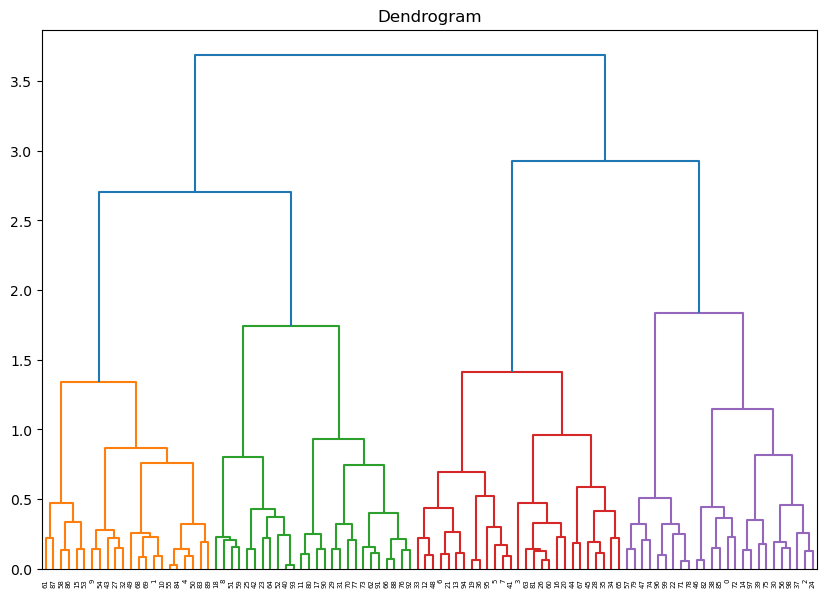

In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Generate synthetic data
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 points in 3-dimensional space

# Perform Agglomerative Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(data)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Cophenetic Correlation Coefficient
Z = linkage(data, 'ward')
coph_corr, coph_dists = cophenet(Z, pdist(data))
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

# Plot Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.show()


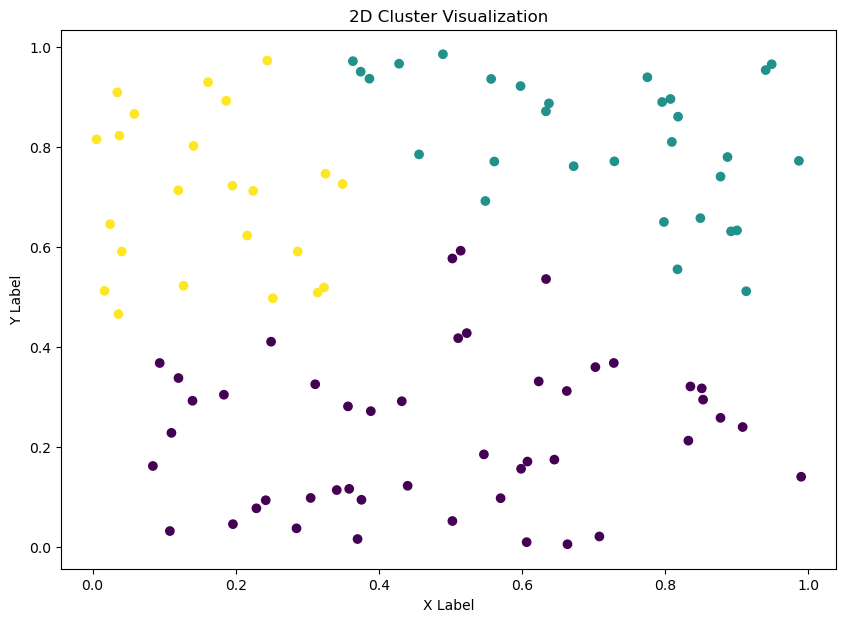

In [22]:
# 2D Visualization
data_2d = data[:, :2]  # Use the first two dimensions for 2D visualization

# Perform Agglomerative Hierarchical Clustering on 2D data
model_2d = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_2d = model_2d.fit_predict(data_2d)

# 2D cluster visualization
plt.figure(figsize=(10, 7))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_2d, cmap='viridis')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('2D Cluster Visualization')
plt.show()

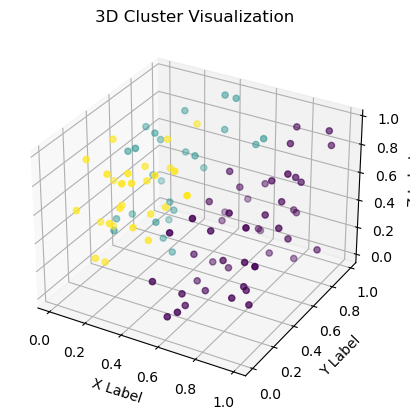

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic 3D data
np.random.seed(42)
data_3d = np.random.rand(100, 3)  # 100 points in 3-dimensional space

# Clustering with Agglomerative Hierarchical Clustering
model_3d = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_3d = model_3d.fit_predict(data_3d)

# 3D cluster visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels_3d, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Cluster Visualization')

plt.show()

## Analysis of Clustering Results

After performing clustering, it's crucial to analyze the results to understand the quality and structure of the clusters formed.

### Silhouette Score
The Silhouette Score provides a measure of how similar an object is to its own cluster compared to other clusters. A high silhouette value indicates well-formed clusters.

### Cophenetic Correlation Coefficient
The Cophenetic Correlation Coefficient measures how faithfully a dendrogram preserves the pairwise distances between the original data points. A high value indicates a good fit.

### Interpretation of Visualizations
- **Dendrogram**: The dendrogram helps to visualize the hierarchical relationship between clusters. The height at which two clusters are merged represents the distance between them.
- **2D and 3D Visualizations**: These visualizations help in understanding the spatial distribution of clusters. Points in the same cluster should be close to each other, while points in different clusters should be farther apart.

## Choosing Hyperparameters

The performance of hierarchical clustering depends on the choice of hyperparameters:

### Number of Clusters
Choosing the right number of clusters (n_clusters) is crucial. This can be determined using methods like the Elbow Method, Silhouette Analysis, or by examining the dendrogram.

### Linkage Method
The linkage method (single, complete, average, ward) affects the shape and size of clusters. Each method has its strengths and is suited for different types of data.

### Distance Metric
The choice of distance metric (Euclidean, Manhattan, etc.) can also impact the clustering results. Euclidean distance is the most commonly used, but other metrics might be more appropriate for specific data types.

## Comparison with Other Clustering Algorithms

Hierarchical clustering is one of many clustering techniques. Here's a brief comparison with other popular algorithms:

### K-Means
- **K-Means**: Efficient for large datasets, requires specifying the number of clusters in advance, sensitive to initial centroid placement.
- **Hierarchical Clustering**: Does not require the number of clusters in advance, can be more computationally intensive, provides a dendrogram for better understanding of data structure.

### DBSCAN
- **DBSCAN**: Can find clusters of arbitrary shape, handles noise well, requires parameters for minimum points and distance.
- **Hierarchical Clustering**: Generally forms convex clusters, sensitive to noise, provides a clear hierarchy of clusters.


# 2. Divisive Hierarchical Clustering

Divisive Hierarchical Clustering is a "top-down" approach where all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

### Mathematical Foundation

In divisive clustering, the key concept is to split clusters based on a measure of dissimilarity until each observation is its own cluster. This can be done using various methods such as K-Means or other partitioning algorithms to decide the splits.

The general steps are as follows:

1. Start with all observations in a single cluster $C$.
2. Choose a cluster to split based on a criterion, typically the cluster with the largest dissimilarity.
3. Split the chosen cluster $C_i$ into two sub-clusters $C_{i1}$ and $C_{i2}$ using a partitioning method like K-Means, which minimizes the within-cluster sum of squares (WCSS):
---


>$$\text{WCSS} = \sum_{j=1}^{k} \sum_{x \in C_j} \| x - \mu_j \|^2$$

Where:
- $\mu_j$ is the centroid of cluster $C_j$.


---
4. Update the set of clusters and repeat steps 2-3 until each observation is in its own cluster or another stopping criterion is met.


### Algorithm Steps

1. Start with all observations in a single cluster.
2. Choose a cluster to split based on a certain criterion (e.g., the cluster with the largest dissimilarity).
3. Split the chosen cluster into two using a partitioning method (e.g., K-Means).
4. Update the clusters and repeat steps 2-3 until each observation is in its own cluster or another stopping criterion is met.

### Implementation with Example

Divisive clustering can be computationally expensive for large datasets, but it provides a clear hierarchy from general to specific clusters. Here we use a simple example to demonstrate the concept.


C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


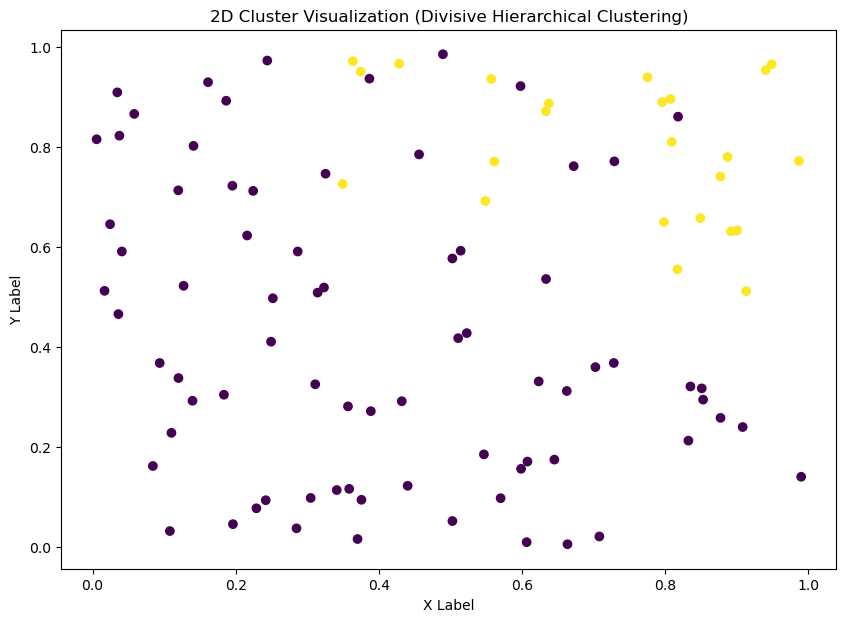

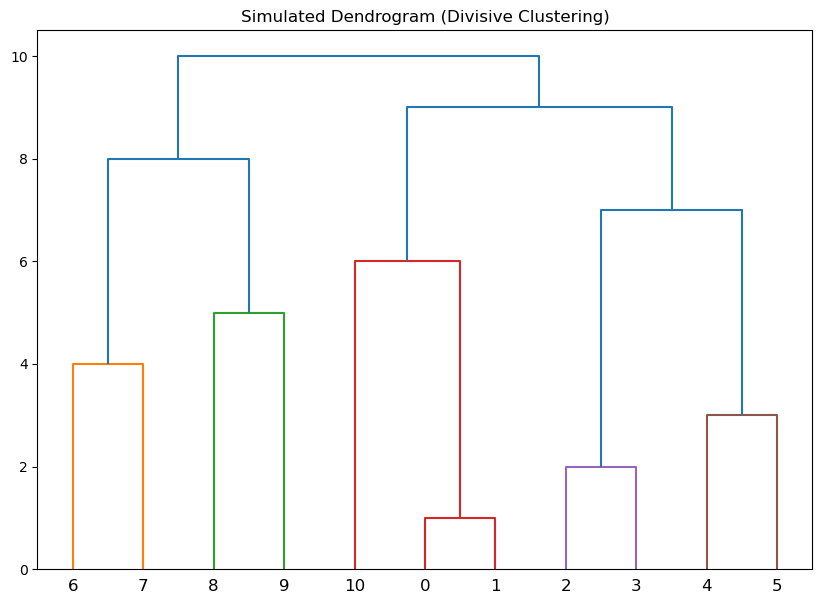

In [24]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 points in 3-dimensional space

def divisive_clustering(data, max_clusters=3):
    # Start with all data in one cluster
    clusters = [data]
    labels = np.zeros(data.shape[0], dtype=int)

    # Perform divisive clustering until max_clusters is reached
    for k in range(1, max_clusters):
        # Choose the cluster to split (largest cluster)
        largest_cluster_index = np.argmax([len(c) for c in clusters])
        largest_cluster = clusters.pop(largest_cluster_index)

        # Split the chosen cluster using K-Means
        kmeans = KMeans(n_clusters=2, random_state=42).fit(largest_cluster)
        subclusters = [largest_cluster[kmeans.labels_ == i] for i in range(2)]

        # Assign new labels
        for i, subcluster in enumerate(subclusters):
            new_label = len(clusters) + i
            indices = np.where(np.isin(data, subcluster).all(axis=1))[0]
            labels[indices] = new_label

        clusters.extend(subclusters)

    return labels

# Perform divisive hierarchical clustering
labels_divisive = divisive_clustering(data, max_clusters=3)

# Plot 2D visualization (using first two dimensions)
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels_divisive, cmap='viridis')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('2D Cluster Visualization (Divisive Hierarchical Clustering)')
plt.show()

# Plot dendrogram for divisive clustering (simulated example)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Simulate a hierarchical clustering model for demonstration
class SimulatedModel:
    def __init__(self):
        self.children_ = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19]])
        self.distances_ = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        self.labels_ = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

# Plot simulated dendrogram
plt.figure(figsize=(10, 7))
plt.title('Simulated Dendrogram (Divisive Clustering)')
plot_dendrogram(SimulatedModel())
plt.show()


### Advantages and Disadvantages

**Advantages:**
- Provides a clear hierarchical structure from general to specific clusters.
- Useful for understanding the overall structure of the data.

**Disadvantages:**
- Computationally expensive for large datasets.
- The choice of partitioning method and stopping criterion can significantly impact the results.


### Real-World Applications

Divisive Hierarchical Clustering can be applied in various domains, including:

- **Market Segmentation**: Identifying distinct customer segments based on purchasing behavior.
- **Document Clustering**: Organizing large sets of documents into meaningful groups.
- **Image Segmentation**: Dividing an image into regions with similar attributes for object recognition.


### Partitioning Methods

Various methods can be used to partition clusters in divisive hierarchical clustering. The choice of method can impact the efficiency and effectiveness of the clustering.

1. **K-Means Clustering**: 
   - Commonly used due to its simplicity and efficiency.
   - Minimizes the within-cluster sum of squares (WCSS).

2. **Spectral Clustering**:
   - Utilizes the eigenvalues of a similarity matrix to perform dimensionality reduction before clustering in fewer dimensions.
   - Effective for complex data structures.

3. **Bisecting K-Means**:
   - A variant of K-Means that repeatedly splits clusters into two.
   - Provides a balance between computational efficiency and clustering accuracy.
